In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Mental Health Disorder Observations

# Description
#Anxiety disorders are a group of mental disorders characterized by significant feelings of anxiety and fear

#ADHD includes a combination of persistent problems, such as difficulty sustaining attention, hyperactivity and impulsive behavior

#Autism spectrum disorder (ASD) is a developmental disorder that affects communication and behavior

#Conduct disorder presents itself through a repetitive and persistent pattern of behavior in which the basic rights of others or major age-appropriate norms are violated.

*Eating disorders include anorexia nervosa, bulimia nervosa, and binge-eating disorder.

#Intellectual disability (ID), once called mental retardation, is characterized by below-average intelligence or mental ability and a lack of skills necessary for day-to-day living. People with intellectual disabilities can and do learn new skills, but they learn them more slowly. There are varying degrees of intellectual disability, from mild to profound.

Depression (Dysthemia, bipolar major depressive disorder or clinical depression) is a common but serious mood disorder. It causes severe symptoms that affect how you feel, think, and handle daily activities, such as sleeping, eating, or working. To be diagnosed with depression, the symptoms must be present for at least two weeks.

#Other mental disorders ???

#Schizophrenia is a chronic and severe mental disorder that affects how a person thinks, feels, and behaves. People with schizophrenia may seem like they have lost touch with reality.


In [3]:
mental_df = pd.read_excel("By Major Cause Name Prevalence All Ages Percent.xlsx")
mental_suicide_df = pd.read_excel("Mental Health Age Standardized.xlsx")

In [4]:
mental_suicide_df.head(5)


,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both,6.4,6.6,7.4,8.1
1,Albania,Both,5.6,5.3,7.7,5.8
2,Algeria,Both,3.3,3.4,3.5,4.7
3,Angola,Both,8.9,9.3,10.4,13.9
4,Antigua and Barbuda,Both,0.5,0.8,0.2,2.1


In [5]:
mental_df.head(5)

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2000,0.038695,0.041587,0.035922
1,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2001,0.038609,0.041278,0.035900
2,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2002,0.038828,0.041407,0.036064
3,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2003,0.039144,0.041818,0.036448
4,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2004,0.039358,0.042145,0.036524


In [6]:
mental_df=mental_df.rename(columns={"location_name": "Country", "cause_name": "Disorder", "year": "Year", "val": "Value"})



In [8]:
mental_df.head()

,measure_id,measure_name,location_id,Country,sex_id,sex_name,age_id,age_name,cause_id,Disorder,metric_id,metric_name,Year,Value,upper,lower
0,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2000,0.038695,0.041587,0.035922
1,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2001,0.038609,0.041278,0.035900
2,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2002,0.038828,0.041407,0.036064
3,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2003,0.039144,0.041818,0.036448
4,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2004,0.039358,0.042145,0.036524


In [9]:
# Store the mean percent of disorders by disorder and country
mental_disorder_df = mental_df.groupby(["Disorder"]).mean()["Value"]

                                    
# Convert to DataFrame
mental_disorder_df = pd.DataFrame(mental_disorder_df)
mental_disorder_df["Value"]=mental_disorder_df["Value"]*100
mental_disorder_df["Value"] = mental_disorder_df["Value"].astype("float")

mental_disorder_df.head(10)

,Value
Disorder,
Anxiety Disorders,3.931425
Attention-Deficit/Hyperactivity Disorders,1.255809
Autism Spectrum Disorders,0.451963
Conduct Disorders,0.835590
Depressive Disorders,1.356672
Eating Disorders,0.161619
Idiopathic Developmental Intellectual Disability,0.773741
Other Mental Disorders,1.928326
Schizophrenia,0.207550


In [10]:
# Create a boxplot to compare means
#mental_suicide_df.boxplot("Value", by="Year", figsize=(20, 10))
#plt.xticks(rotation=90)

In [11]:
mental_df.head()


,measure_id,measure_name,location_id,Country,sex_id,sex_name,age_id,age_name,cause_id,Disorder,metric_id,metric_name,Year,Value,upper,lower
0,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2000,0.038695,0.041587,0.035922
1,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2001,0.038609,0.041278,0.035900
2,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2002,0.038828,0.041407,0.036064
3,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2003,0.039144,0.041818,0.036448
4,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2004,0.039358,0.042145,0.036524


In [12]:
mental_df.columns = ['measure_id', 'measure_name', 'location_id', 'Country', 'sex_id', 'sex_name', 'age_id', 'age_name', 'cause_id',
                    'Disorder', 'metric_id', 'metric_name', 'Year', 'Value', 'Upper Value', 'Lower Value']
#mental_df = mental_df.rename(columns={'location_name': 'Country', 'sex_name': 'Sex', 'cause_name: Disorder'} axis='columns')
mental_df.head()

,measure_id,measure_name,location_id,Country,sex_id,sex_name,age_id,age_name,cause_id,Disorder,metric_id,metric_name,Year,Value,Upper Value,Lower Value
0,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2000,0.038695,0.041587,0.035922
1,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2001,0.038609,0.041278,0.035900
2,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2002,0.038828,0.041407,0.036064
3,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2003,0.039144,0.041818,0.036448
4,5,Prevalence,160,Afghanistan,3,Both,22,All Ages,571,Anxiety Disorders,2,Percent,2004,0.039358,0.042145,0.036524


In [13]:
# Store the mean percent of disorders by disorder and country
mental_disorder_df = mental_df.groupby(["Disorder"]).mean()["Value"]

                                    
# Convert to DataFrame
mental_disorder_df = pd.DataFrame(mental_disorder_df)
mental_disorder_df["Value"]=mental_disorder_df["Value"]*100
mental_disorder_df["Value"] = mental_disorder_df["Value"].astype("float")

mental_disorder_df.head(10)


,Value
Disorder,
Anxiety Disorders,3.931425
Attention-Deficit/Hyperactivity Disorders,1.255809
Autism Spectrum Disorders,0.451963
Conduct Disorders,0.835590
Depressive Disorders,1.356672
Eating Disorders,0.161619
Idiopathic Developmental Intellectual Disability,0.773741
Other Mental Disorders,1.928326
Schizophrenia,0.207550


In [14]:
mental_disorder_df.dtypes

Value    float64
dtype: object

In [15]:
mental_disorder_df = mental_disorder_df.reset_index()

mental_disorder_df.head(10)

,Disorder,Value
0,Anxiety Disorders,3.931425
1,Attention-Deficit/Hyperactivity Disorders,1.255809
2,Autism Spectrum Disorders,0.451963
3,Conduct Disorders,0.835590
4,Depressive Disorders,1.356672
5,Eating Disorders,0.161619
6,Idiopathic Developmental Intellectual Disability,0.773741
7,Other Mental Disorders,1.928326
8,Schizophrenia,0.207550


In [16]:
# Store the Standard Error associated with values Grouped by disorder
#mental_disorder_sem = mental_disorder_df.groupby(["cause_name"]).sem()["val"]
#mental_disorder_sem["val"] = mental_disorder_sem["val"].astype("float")

# Convert to DataFrame
#mental_disorder_sem = pd.DataFrame(mental_disorder_sem)

# Preview DataFrame
#mental_disorder_sem.head(12)

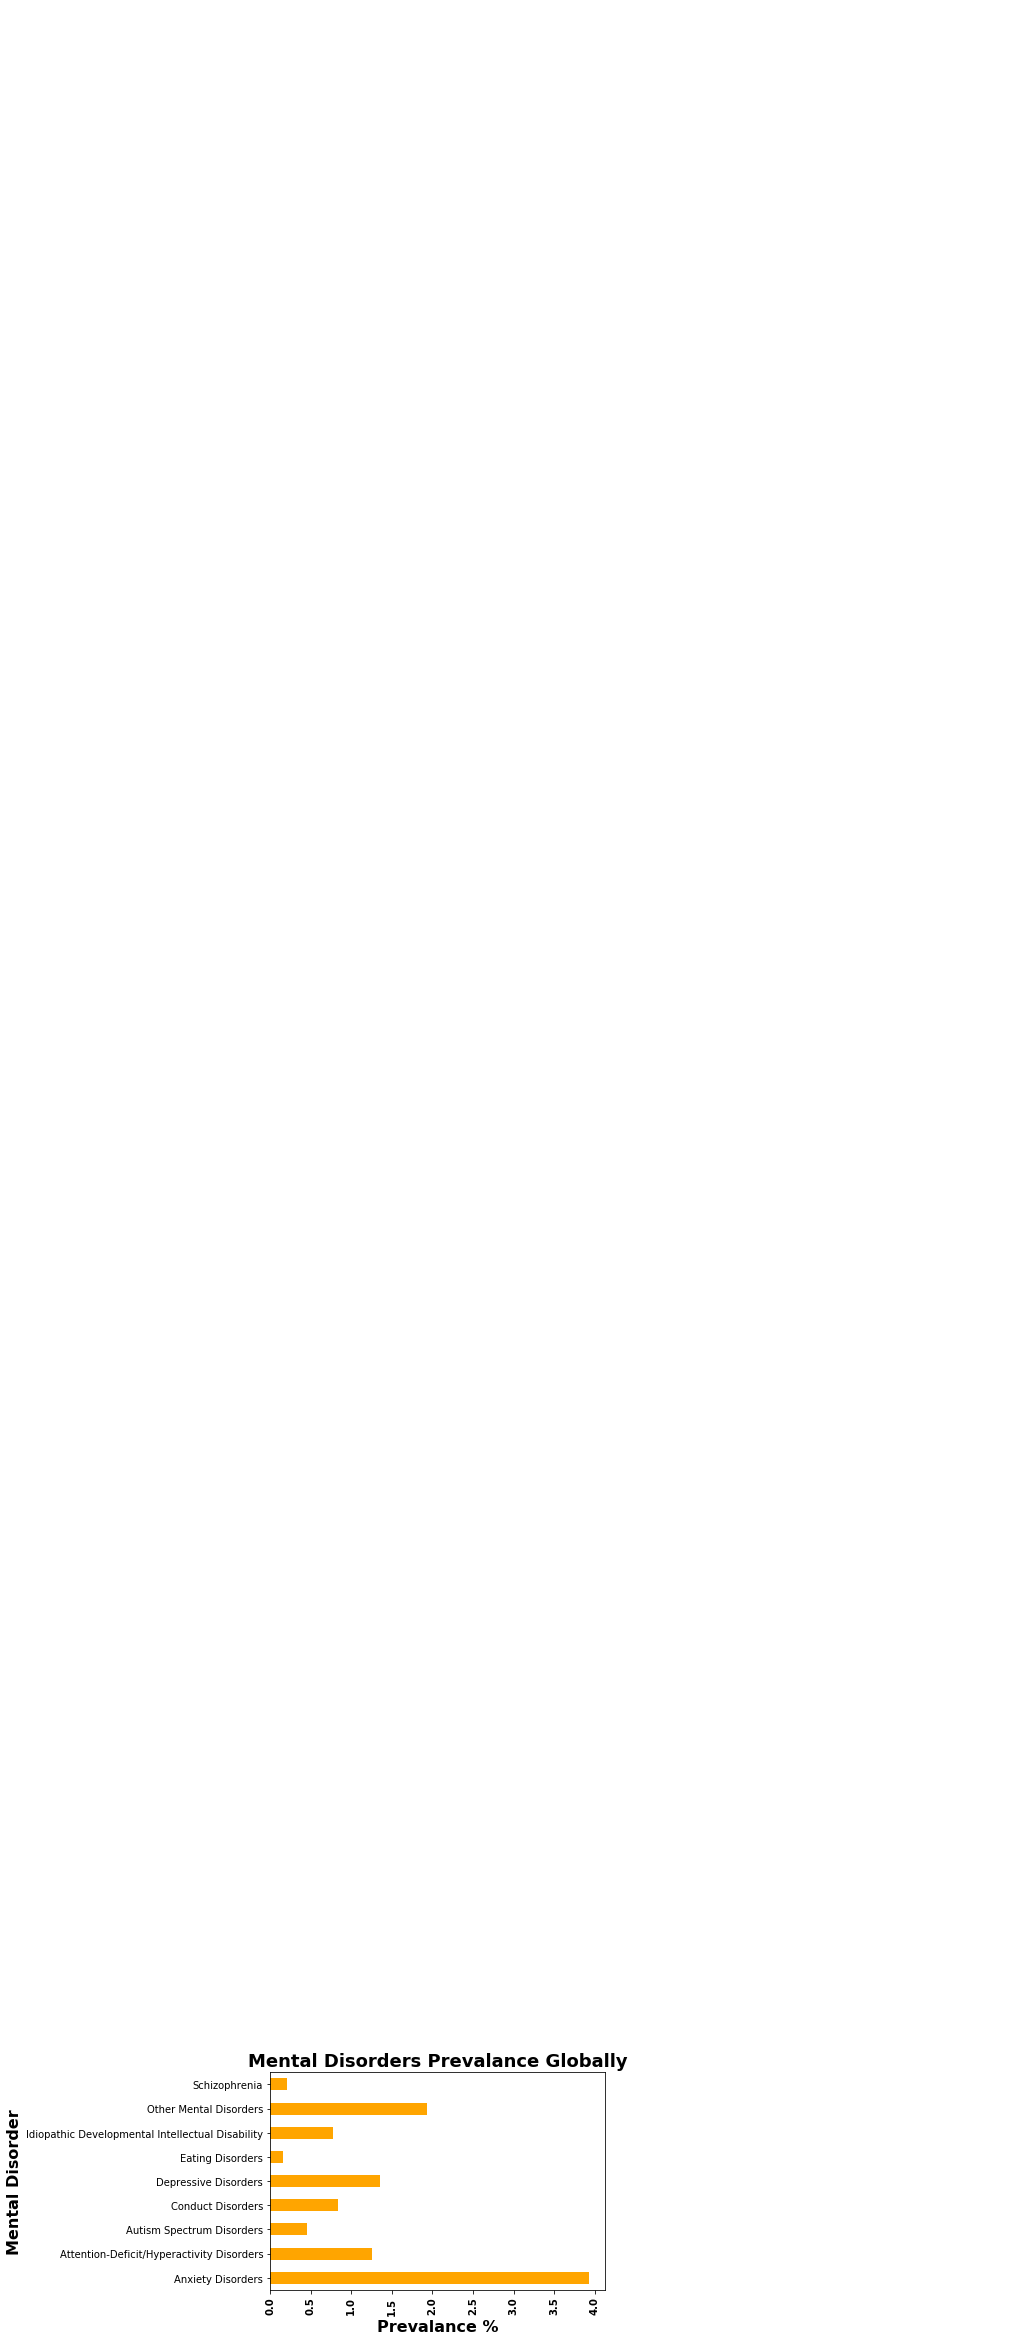

In [17]:
mental_disorder_df.reset_index(drop=True)
mental_disorder_bar_df = mental_disorder_df.set_index(["Disorder"])

ax = mental_disorder_bar_df.plot.barh(y="Value", legend=False, color="orange")
for i, label in enumerate(list(mental_disorder_bar_df.index)):
    ax.annotate("{} %".format(mental_disorder_bar_df["Value"][i]),(i, 90),ha="left",rotation=45)


plt.ylabel("Mental Disorder", fontsize=16, weight="bold")
plt.xlabel("Prevalance %", fontsize=16, weight="bold")
plt.title("Mental Disorders Prevalance Globally", fontsize=18, weight="bold")
plt.xticks(rotation=90, weight="bold")

plt.savefig("Mental_Disorders_Global.png")
plt.show()


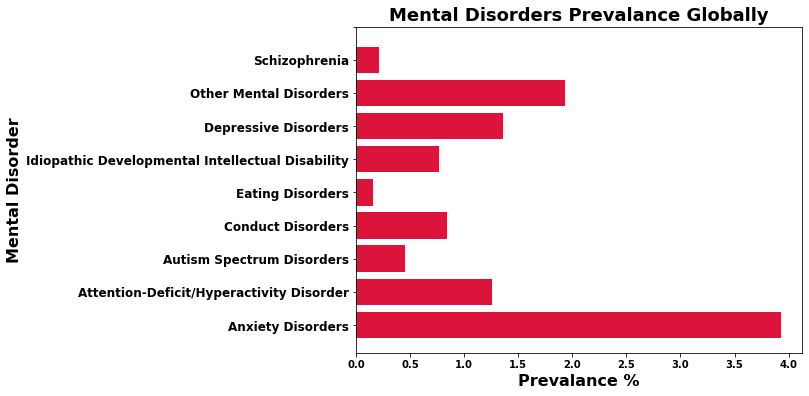

In [18]:
#HOW TO BAR CHART WITH EACH MENTAL DISORDER AND THEIR MEAN VALUES
disorders = ["Anxiety Disorders", "Attention-Deficit/Hyperactivity Disorder",
             "Autism Spectrum Disorders","Conduct Disorders", 
             "Eating Disorders", "Idiopathic Developmental Intellectual Disability", "Depressive Disorders",
            "Other Mental Disorders", "Schizophrenia"]
values = [3.93, 1.26, 0.45, 0.84, 0.16, 0.77, 1.36, 1.93, 0.21]


y_pos = np.arange(len(disorders)+0.5)

plt.figure(figsize=(8,6))
plt.barh(disorders, values, color="crimson")

plt.yticks(y_pos, disorders, fontsize=12, weight="bold")
plt.xticks(weight="bold")
#plt.text(0, 2, '4%', fontweight='bold')


plt.ylabel("Mental Disorder", fontsize=16, weight="bold")
plt.xlabel("Prevalance %", fontsize=16, weight="bold")
plt.title("Mental Disorders Prevalance Globally", fontsize=18, weight="bold")

plt.savefig("Mental_Disorders_Globally.png")
plt.show()


In [20]:
# Store the mean percentages of disorders by country
mental_disorder_country_df = mental_df.groupby(["Country", "Disorder"]).mean()["Value"]
mental_disorder_country_df = pd.DataFrame(mental_disorder_country_df)
mental_disorder_country_df["Value"]=mental_disorder_country_df["Value"]*100
mental_disorder_country_df

Value
Country     Disorder                                                  
Afghanistan Anxiety Disorders                                 4.064113
            Attention-Deficit/Hyperactivity Disorders         1.297973
            Autism Spectrum Disorders                         0.357897
            Conduct Disorders                                 1.208300
            Depressive Disorders                              1.173393
...                                                                ...
Zimbabwe    Depressive Disorders                              0.954683
            Eating Disorders                                  0.088152
            Idiopathic Developmental Intellectual Disability  0.706290
            Other Mental Disorders                            1.455219
            Schizophrenia                                     0.117296

[1755 rows x 1 columns]

In [21]:
highest_disorder_countries = mental_disorder_country_df.sort_values(by=['Value'], ascending=False).head(15)
highest_disorder_countries = highest_disorder_countries['Value'].round(2)
highest_disorder_countries = highest_disorder_countries.reset_index()
highest_disorder_countries 

,Country,Disorder,Value
0,New Zealand,Anxiety Disorders,8.75
1,Norway,Anxiety Disorders,7.81
2,Iran,Anxiety Disorders,7.31
3,United States,Anxiety Disorders,7.12
4,Netherlands,Anxiety Disorders,6.85
5,France,Anxiety Disorders,6.82
6,Germany,Anxiety Disorders,6.76
7,Australia,Anxiety Disorders,6.64
8,Chile,Anxiety Disorders,6.54
9,Brazil,Anxiety Disorders,6.53


<Figure size 576x432 with 0 Axes>

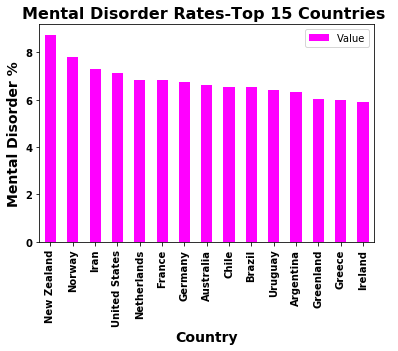

In [22]:
#plot top 15 countries rates of mental disorder

plt.figure(figsize=(8,6))
highest_disorder_countries.plot("Country", 'Value', kind='bar', color="magenta")


plt.yticks(weight="bold")
plt.xticks(weight="bold")
#plt.text(0, 2, '4%', fontweight='bold')


plt.ylabel("Mental Disorder %", fontsize=14, weight="bold")
plt.xlabel("Country", fontsize=14, weight="bold")
plt.title("Mental Disorder Rates-Top 15 Countries ", fontsize=16, weight="bold")

plt.savefig("Top_15_Disorders.png")
plt.show()


In [23]:
lowest_disorder_countries = mental_disorder_country_df.sort_values(by=['Value'], ascending=True).head(15)
lowest_disorder_countries = lowest_disorder_countries[['Value']].round(2)
lowest_disorder_countries = lowest_disorder_countries.reset_index()
lowest_disorder_countries

,Country,Disorder,Value
0,Somalia,Eating Disorders,0.05
1,Niger,Eating Disorders,0.05
2,Democratic Republic of the Congo,Eating Disorders,0.05
3,Liberia,Eating Disorders,0.06
4,Burundi,Eating Disorders,0.06
5,Ethiopia,Eating Disorders,0.06
6,Mozambique,Eating Disorders,0.06
7,Afghanistan,Eating Disorders,0.06
8,Solomon Islands,Eating Disorders,0.06
9,Central African Republic,Eating Disorders,0.06


<Figure size 576x432 with 0 Axes>

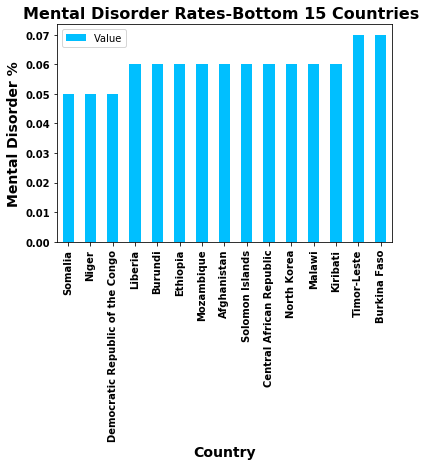

In [24]:
#plot bottom 15 countries rates of mental disorder

plt.figure(figsize=(8,6))
lowest_disorder_countries.plot("Country", 'Value', kind='bar', color='deepskyblue')


plt.yticks(weight="bold")
plt.xticks(weight="bold")
#plt.text(0, 2, '4%', fontweight='bold')


plt.ylabel("Mental Disorder %", fontsize=14, weight="bold")
plt.xlabel("Country", fontsize=14, weight="bold")
plt.title("Mental Disorder Rates-Bottom 15 Countries ", fontsize=16, weight="bold")

plt.savefig("Bottom_15_Disorders.png")
plt.show()

In [25]:
# Store the mean percentages of disorders by year-18 years
mental_disorder_year_df = mental_df.groupby(["Year", "Disorder"]).mean()["Value"]
mental_disorder_year_df = pd.DataFrame(mental_disorder_year_df)
mental_disorder_year_df["Value"]=mental_disorder_year_df["Value"]*100
mental_disorder_year_df

Value
Year Disorder                                                  
2000 Anxiety Disorders                                 3.849872
     Attention-Deficit/Hyperactivity Disorders         1.291066
     Autism Spectrum Disorders                         0.454447
     Conduct Disorders                                 0.898215
     Depressive Disorders                              1.316309
...                                                         ...
2017 Depressive Disorders                              1.397472
     Eating Disorders                                  0.165754
     Idiopathic Developmental Intellectual Disability  0.658293
     Other Mental Disorders                            2.023458
     Schizophrenia                                     0.218901

[162 rows x 1 columns]

In [26]:
# Minor Data Munging to Re-Format the Data Frames
mental_disorder_year_df = mental_disorder_year_df.reset_index()
mental_disorder_year_df_pivot = mental_disorder_year_df.pivot(index="Year", columns="Disorder")["Value"]

# Preview the Data Frame
mental_disorder_year_df_pivot

Disorder,Anxiety Disorders,Attention-Deficit/Hyperactivity Disorders,Autism Spectrum Disorders,Conduct Disorders,Depressive Disorders,Eating Disorders,Idiopathic Developmental Intellectual Disability,Other Mental Disorders,Schizophrenia
Year,,,,,,,,,
2000,3.849872,1.291066,0.454447,0.898215,1.316309,0.153927,0.899252,1.827355,0.195246
2001,3.862039,1.288054,0.454060,0.893169,1.321795,0.154749,0.886575,1.838854,0.196655
2002,3.873947,1.285179,0.453765,0.887794,1.327221,0.155785,0.872375,1.850721,0.198124
2003,3.885442,1.282150,0.453527,0.881801,1.332567,0.156987,0.857307,1.862755,0.199616
2004,3.896381,1.278647,0.453272,0.875016,1.337819,0.158162,0.842000,1.874833,0.201101
2005,3.906846,1.274529,0.452952,0.867279,1.342992,0.159154,0.827190,1.886978,0.202554
2006,3.916711,1.269867,0.452634,0.858769,1.347541,0.160179,0.811337,1.899398,0.204047
2007,3.926433,1.265090,0.452416,0.849800,1.351167,0.161460,0.793632,1.912260,0.205620
2008,3.935367,1.260097,0.452230,0.840438,1.354287,0.162735,0.775587,1.924912,0.207196


In [27]:
x=["Year"]
y=["Disorder"]


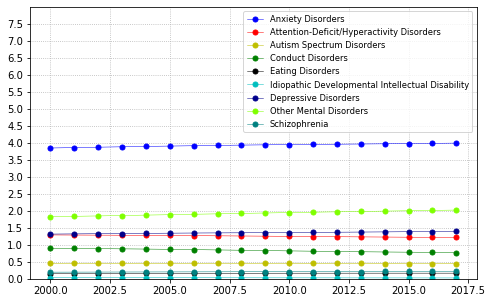

In [28]:
#create a line chart to show change for each disorder over 18 years

plt.figure(figsize=(8,5))
plt.plot(mental_disorder_year_df_pivot["Anxiety Disorders"], marker="o", color="b", markersize=5, linewidth=0.50, label="Anxiety Disorders")
plt.plot(mental_disorder_year_df_pivot["Attention-Deficit/Hyperactivity Disorders"], marker="o", color="r", markersize=5, linewidth=0.50, label="Attention-Deficit/Hyperactivity Disorders")
plt.plot(mental_disorder_year_df_pivot["Autism Spectrum Disorders"], marker="o", color="y", markersize=5, linewidth=0.50, label="Autism Spectrum Disorders")
plt.plot(mental_disorder_year_df_pivot["Conduct Disorders"], marker="o", color="g", markersize=5, linewidth=0.50, label="Conduct Disorders")
plt.plot(mental_disorder_year_df_pivot["Eating Disorders"], marker="o", color="k", markersize=5, linewidth=0.50, label="Eating Disorders")
plt.plot(mental_disorder_year_df_pivot["Idiopathic Developmental Intellectual Disability"]/26, marker="o", color="c", markersize=5, linewidth=0.50, label="Idiopathic Developmental Intellectual Disability")
plt.plot(mental_disorder_year_df_pivot["Depressive Disorders"], marker="o", color="darkblue", markersize=5, linewidth=0.50, label="Depressive Disorders")
plt.plot(mental_disorder_year_df_pivot["Other Mental Disorders"], marker="o", color="chartreuse", markersize=5, linewidth=0.50, label="Other Mental Disorders")
plt.plot(mental_disorder_year_df_pivot["Schizophrenia"], marker="o", color="teal", markersize=5, linewidth=0.50, label="Schizophrenia")

plt.ylim(0,8)
plt.yticks(np.arange(0, 8, 0.5))
#plt.xlim(0, 50)
#plt.title("Mental Disorders By Year Globally", fontsize=18)
#plt.ylabel("Value %", fontsize=12)
#plt.xlabel("Years", fontsize=12)
plt.grid(linestyle="dotted")
plt.legend(loc="best", fontsize="small", frameon=True)

# Save the Figure
plt.savefig("MentalDisordersOverYears.png")

# Show the Figure
plt.show()

In [ ]:
#create a stacked bar chart


(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

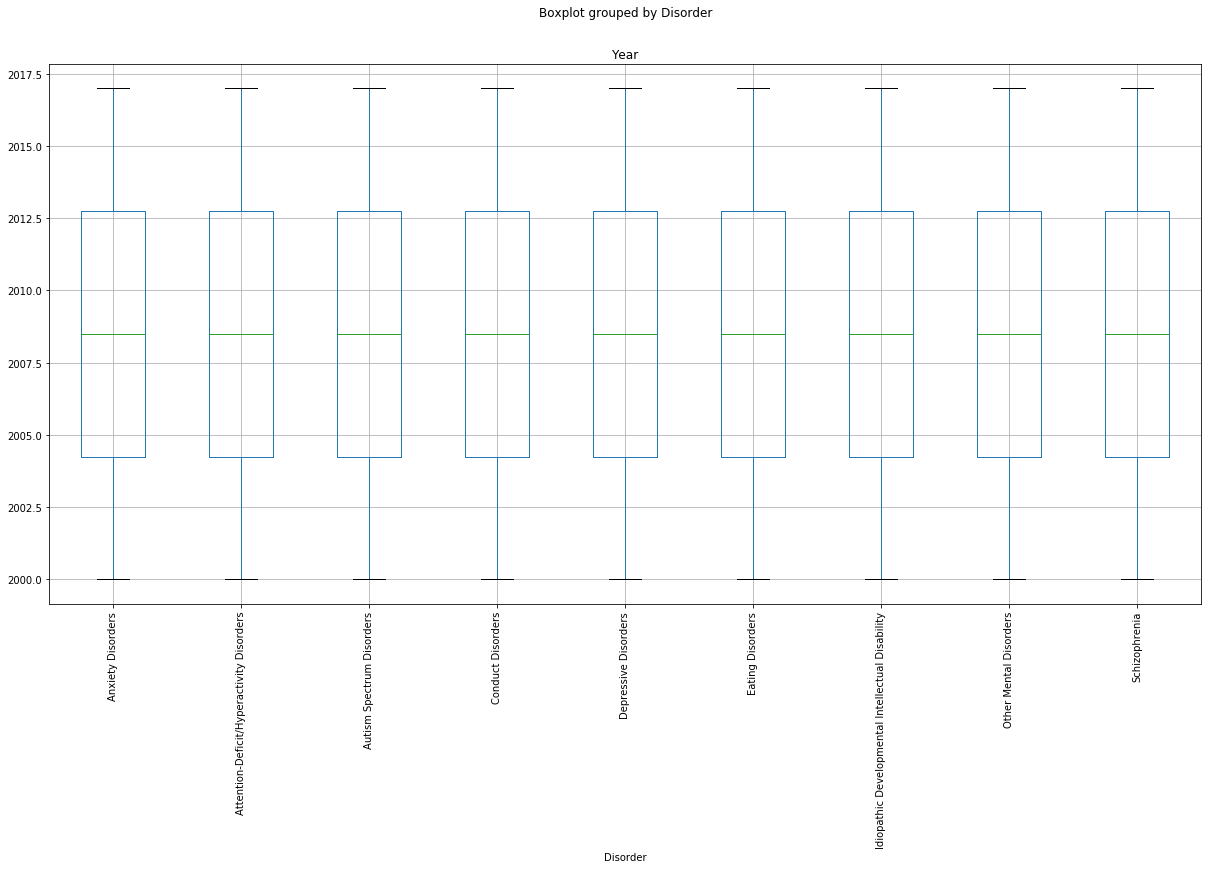

In [29]:
# Create a boxplot to compare means
mental_disorder_year_df.boxplot("Year", by="Disorder", figsize=(20, 10))
plt.xticks(rotation=90)

In [30]:
# Extract individual groups
group2 = mental_disorder_df[mental_disorder_df["Disorder"] == "Anxiety Disorders"]["Value"]
group3 = mental_disorder_df[mental_disorder_df["Disorder"] == "Attention-Deficit/Hyperactivity Disorders"]["Value"]
group4 = mental_disorder_df[mental_disorder_df["Disorder"] == "Autism spectrum disorders"]["Value"]
group7 = mental_disorder_df[mental_disorder_df["Disorder"] == "Conduct Disorders"]["Value"]
group9 = mental_disorder_df[mental_disorder_df["Disorder"] == "Eating Disorders"]["Value"]
group10 = mental_disorder_df[mental_disorder_df["Disorder"] == "Idiopathic Developmental Intellectual Disability"]["Value"]
group11 = mental_disorder_df[mental_disorder_df["Disorder"] == "Depressive Disorder"]["Value"]
group12 = mental_disorder_df[mental_disorder_df["Disorder"] == "Other Mental Disorders"]["Value"]
group13 = mental_disorder_df[mental_disorder_df["Disorder"] == "Schizophrenia"]["Value"]

In [31]:
# Perform the ANOVA
stats.f_oneway(group2, group3, group4, group7, group9, group10, group11, group12, group13)

F_onewayResult(statistic=nan, pvalue=nan)